In [1]:
# Para conocer el enunciado del problema, consultar el libro:
# Metodos Numericos Aplicados a la Ingeniería: Casos de estudio utilizando MATLAB (2014)
# por Héctor Jorquera y Claudio Gelmi
# 
# Código Python escrito por Claudio Gelmi, Ph.D.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.integrate import solve_ivp

In [3]:
# Parámetros
ro = 2500; cp = 100; hc = 15
h = 4; d = 0.01; w = 0.005
Tc = 318.16; Th = 356.16

# Modelo cara 1
def cara1(ang, z):
    # Differential equations: face exposed to hot air
    dz1 = h*(Th - z)/(cp*d*ro*w)
    return dz1

# Modelo cara 2
def cara2(ang, z):
    # Differential equations: face exposed to the refrigerant liquid
    dz2 = -hc*(z - Tc)/(cp*d*ro*w)
    return dz2

# Tiempos de integración para cara 1
t1 = (0, np.pi)
t1values = np.linspace(0, np.pi, 100)
# Tiempos de integración para cara 2
t2 = (np.pi, 2*np.pi)
t2values = np.linspace(np.pi, 2*np.pi, 100)

In [4]:
# Función de costo a optimizar
def int_tambor(condInicial):
    T1 = solve_ivp(cara1, t1, condInicial, t_eval=t1values).y
    T2 = solve_ivp(cara2, t2, y0=[T1[0,-1]], t_eval=t2values).y
    # Función costo
    return (condInicial - T2[0,-1])**2

# Rutina de optimización
result = minimize(int_tambor, x0=325)
print(result)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 4.727095638026278e-13
        x: [ 3.188e+02]
      nit: 4
      jac: [-1.349e-06]
 hess_inv: [[ 5.085e-01]]
     nfev: 10
     njev: 5


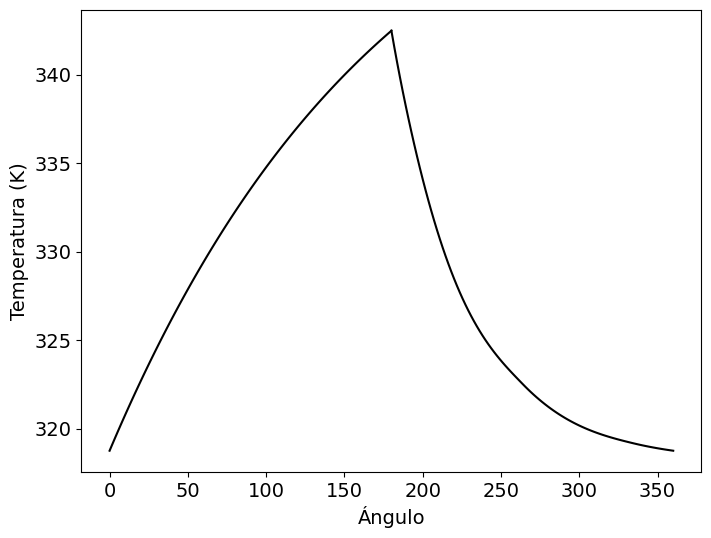

In [5]:
# Simulamos para generar los datos a graficar
condInicial_optima = result.x
T1 = solve_ivp(cara1, t1, condInicial_optima, t_eval=t1values).y
T2 = solve_ivp(cara2, t2, y0=[T1[0,-1]], t_eval=t2values).y

# Graficamos
plt.figure(figsize=(8,6))
plt.plot(t1values/np.pi*180, T1[0], 'k')
plt.plot(t2values/np.pi*180, T2[0], 'k')
plt.xlabel('Ángulo', fontsize=14)
plt.ylabel('Temperatura (K)', fontsize=14)
plt.tick_params(axis='both', labelsize=14)

plt.show()